In [144]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sb
from scipy import stats
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [145]:
df = pd.read_csv("nyc-rolling-sales.csv")
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [146]:

df.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [147]:
#Unnamed: 0 isn't really neeeded in this dataset so we drop it
df.drop('Unnamed: 0', inplace =True, axis = 1)

In [148]:
#depicting the data types in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
BOROUGH                           84548 non-null int64
NEIGHBORHOOD                      84548 non-null object
BUILDING CLASS CATEGORY           84548 non-null object
TAX CLASS AT PRESENT              84548 non-null object
BLOCK                             84548 non-null int64
LOT                               84548 non-null int64
EASE-MENT                         84548 non-null object
BUILDING CLASS AT PRESENT         84548 non-null object
ADDRESS                           84548 non-null object
APARTMENT NUMBER                  84548 non-null object
ZIP CODE                          84548 non-null int64
RESIDENTIAL UNITS                 84548 non-null int64
COMMERCIAL UNITS                  84548 non-null int64
TOTAL UNITS                       84548 non-null int64
LAND SQUARE FEET                  84548 non-null object
GROSS SQUARE FEET                 84548 non-null object
YE

In [149]:
#renaming the columns so we can refer to them
df.colunmns = ['BO_ROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY',
       'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'EASE_MENT',
       'BUILDING_CLASS_AT_PRESENT', 'ADDRESS', 'APARTMENT_NUMBER', 'ZIP_CODE',
       'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL_UNITS',
       'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT',
       'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE',
       'SALE_PRICE', 'SALE_DATE']
df.head()

C:\Users\ousma\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [150]:
#checking for nulls in the dataset, the dataset showing that
#there aren't missing values while there are
#futher int he analuysis we will redefine the types of the  features
df.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [152]:
# re-defining the types of the features so that the missing values can be refered to
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET']= pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')

In [153]:
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [154]:
#just to make sure we got everything we'll d ot he same thing for the other features
df['NEIGHBORHOOD'] = df['NEIGHBORHOOD'].astype('category')
df['BUILDING CLASS CATEGORY'] = df['BUILDING CLASS CATEGORY'].astype('category')
df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].astype('category')
df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].astype('category')
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')
df['BOROUGH'] = df['BOROUGH'].astype('category')

In [155]:
#missing values are showing for all the attributes now
#noticing the number of missing values in three of the columns
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [156]:
#removing attributes related to the lcaotion of the buildings
del df['ZIP CODE']
del df['BUILDING CLASS AT TIME OF SALE']
del df['BUILDING CLASS AT PRESENT']
del df['APARTMENT NUMBER']
del df['ADDRESS']


In [157]:
#figured that this attribute had redundant values
df['EASE-MENT'].describe()

count     84548
unique        1
top            
freq      84548
Name: EASE-MENT, dtype: object

In [158]:
#removed it of the dataset
del df['EASE-MENT']

In [159]:
#this column depicts categorical values 
df['BOROUGH'].describe()

count     84548
unique        5
top           4
freq      26736
Name: BOROUGH, dtype: int64

In [160]:
df['BOROUGH'].value_counts()

4    26736
3    24047
1    18306
5     8410
2     7049
Name: BOROUGH, dtype: int64

In [161]:
#converted the BOROUGH feature to numeric values
df["BOROUGH"] =  pd.to_numeric(df['BOROUGH'], errors = 'coerce')

In [164]:
df['TAX CLASS AT TIME OF SALE'].describe()

count    84548.000000
mean         1.657485
std          0.819341
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: TAX CLASS AT TIME OF SALE, dtype: float64

In [165]:
# tax class has categorical values as well therefore we'll have to convert
#them to numerical values
#droped tax class at time present
df['TAX CLASS AT TIME OF SALE'] = pd.to_numeric(df['TAX CLASS AT TIME OF SALE'], errors = 'coerce')
df = df.drop(['TAX CLASS AT PRESENT'])

KeyError: "['TAX CLASS AT PRESENT'] not found in axis"

In [166]:
df['TAX CLASS AT TIME OF SALE'].value_counts()

1    41533
2    36726
4     6285
3        4
Name: TAX CLASS AT TIME OF SALE, dtype: int64

In [167]:
del df['TAX CLASS AT PRESENT']

In [168]:
df['NEIGHBORHOOD'].describe()

count              84548
unique               254
top       FLUSHING-NORTH
freq                3068
Name: NEIGHBORHOOD, dtype: object

In [169]:
df['BUILDING CLASS CATEGORY'].describe()

count                                           84548
unique                                             47
top       01 ONE FAMILY DWELLINGS                    
freq                                            18235
Name: BUILDING CLASS CATEGORY, dtype: object

In [170]:
df = df.drop(columns=["SALE DATE", "BLOCK", "LOT", "NEIGHBORHOOD"],axis=1)

In [182]:
#label encoding of building class category
df["BUILDING CLASS CATEGORY"] = df["BUILDING CLASS CATEGORY"].cat.codes

In [183]:
#columns with the missing values
df.columns[df.isnull().any()]

Index([], dtype='object')

In [184]:
df.isnull().sum()

BOROUGH                      0
BUILDING CLASS CATEGORY      0
RESIDENTIAL UNITS            0
COMMERCIAL UNITS             0
TOTAL UNITS                  0
LAND SQUARE FEET             0
GROSS SQUARE FEET            0
YEAR BUILT                   0
TAX CLASS AT TIME OF SALE    0
SALE PRICE                   0
dtype: int64

In [185]:
#percentage of the missing values
#sale price  >>  17%
#LAND SQUARE FEET >> 31%
# GROSS SQUARE FEET >> 32%
df_missing = (df.isnull().sum()/ len(df) ) * 100
df_missing = df_missing[df_missing > 0]
df_missing.sort_values(inplace=True)
df_missing


Series([], dtype: float64)

<module 'seaborn' from 'C:\\Users\\ousma\\Anaconda3\\lib\\site-packages\\seaborn\\__init__.py'>

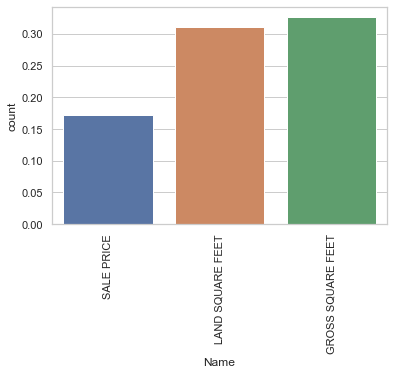

In [186]:
sb.set(style='whitegrid',color_codes=True)
sb.barplot(x='Name', y='count',data=miss)
plt.xticks(rotation=90)
sb

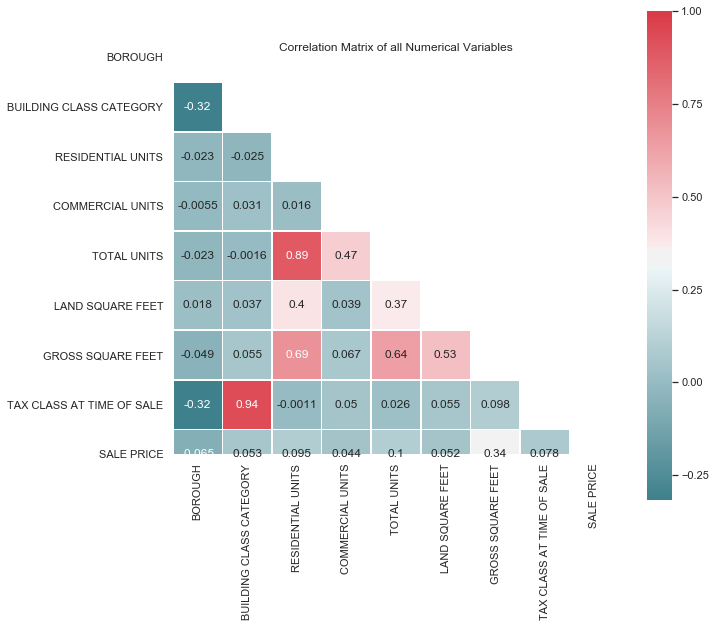

In [187]:
# Compute the correlation matrix
d= df[['BOROUGH', 'BUILDING CLASS CATEGORY', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'TAX CLASS AT TIME OF SALE','SALE PRICE']]
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 9))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(210, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask=mask, 
            square=True, linewidths= .5, annot=True, cmap=cmap)
plt.yticks(rotation=0)
plt.title('Correlation Matrix of all Numerical Variables')
plt.show()

In [188]:
df

,BOROUGH,BUILDING CLASS CATEGORY,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
0,1,6,5,0,5,1633.0,6440.0,1900,2,6.625000e+06
1,1,6,28,3,31,4616.0,18690.0,1900,2,1.276456e+06
2,1,6,16,1,17,2212.0,7803.0,1900,2,1.276456e+06
3,1,6,10,0,10,2272.0,6794.0,1913,2,3.936272e+06
4,1,6,6,0,6,2369.0,4615.0,1900,2,8.000000e+06
...,...,...,...,...,...,...,...,...,...,...
84543,5,1,2,0,2,2400.0,2575.0,1998,1,4.500000e+05
84544,5,1,2,0,2,2498.0,2377.0,1998,1,5.500000e+05
84545,5,1,2,0,2,4000.0,1496.0,1925,1,4.600000e+05
84546,5,20,0,7,7,208033.0,64117.0,2001,4,1.169334e+07


In [192]:
 = KNN(k=3).fit_transform(df)
from sklearn.impute import KNNImputer
x, y, z = np.array_split(df, 3)
KNN =  KNNImputer(n_neighbors = 3)
x = KNN.fit_transform(x)
y = KNN.fit_transform(y)
z = KNN.fit_transform(z)

In [199]:
data = pd.DataFrame(np.concatenate((x, y, z), axis=0))
data.columns = df.columns

#Save data
data.to_csv('preprocessedNYCdata.csv', encoding='utf-8', index=False)

In [200]:
#new preprocessed data
data = pd.read_csv('preprocessedNYCdata.csv')

In [194]:
#now we notice that the missing values are gone
df.isnull().sum()

BOROUGH                      0
BUILDING CLASS CATEGORY      0
RESIDENTIAL UNITS            0
COMMERCIAL UNITS             0
TOTAL UNITS                  0
LAND SQUARE FEET             0
GROSS SQUARE FEET            0
YEAR BUILT                   0
TAX CLASS AT TIME OF SALE    0
SALE PRICE                   0
dtype: int64

In [196]:
#Outlier Analysis
#data significanly changes because of the  rows dropped
from scipy import stats
z = np.abs(stats.zscore(df))
df = df[(z < 3).all(axis=1)]
df.shape

(74871, 10)

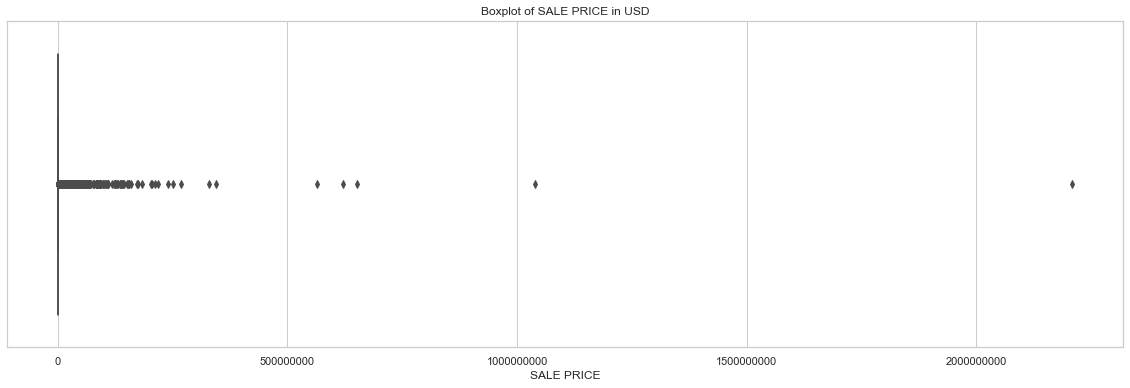

In [208]:
#Box plot of the sale proce

plt.figure(figsize = (20,6))
sb.boxplot(x = 'SALE PRICE', data = data)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')
plt.show()